In [ ]:
!pip install findspark

import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession\
        .builder\
        .appName("MidtermTakeHome")\
        .getOrCreate()
spark

ValueError: ignored

In [ ]:
df = spark.read.option("header", "true").csv("C:/data_Q1_2019/*.csv")

In [ ]:
df.show(5)

+--------------------+----------+--------------------+
|               model|  features|     Scaled_features|
+--------------------+----------+--------------------+
|HGST HMS5C4040ALE640|[0.232942]|[0.00788089736996...|
|HGST HMS5C4040BLE640|[0.342336]|[0.01158191688078...|
|HGST HUH721212ALE600|[2.599715]|[0.0879535983470046]|
|HGST HUH721212ALN604|[0.562081]|[0.01901633314131...|
|HGST HUH728080ALE600|[1.169897]|[0.03957997351454...|
+--------------------+----------+--------------------+
only showing top 5 rows



In [ ]:
df.createOrReplaceTempView("records")

In [ ]:
q1=spark.sql("SELECT model, count(*) AS drivedays FROM records GROUP BY model")
q1.show()

+--------------------+---------+
|               model|drivedays|
+--------------------+---------+
|         ST4000DM000|  1989429|
|       ST12000NM0007|  2955025|
|         ST8000DM005|     2250|
|          ST320LT007|       85|
| TOSHIBA MQ01ABF050M|    32624|
|        ST8000NM0055|  1294451|
|Seagate BarraCuda...|      265|
| TOSHIBA MG07ACA14TA|   109404|
|        WDC WD60EFRX|    30523|
|         ST8000DM002|   888741|
|         ST4000DM005|     4848|
|         DELLBOSS VD|      540|
|HGST HUS726040ALE610|     2598|
|     TOSHIBA HDWF180|     1798|
|HGST HMS5C4040ALE640|   313383|
|HGST HUH721010ALE600|     1245|
| TOSHIBA MD04ABA500V|     4050|
| TOSHIBA MD04ABA400V|    12662|
|       ST10000NM0086|   108555|
|      WDC WD2500AAJS|       88|
+--------------------+---------+
only showing top 20 rows



In [ ]:
q2=spark.sql("SELECT model, count(*) AS failures FROM records WHERE failure = 1 GROUP BY model")
q2.show()

+--------------------+--------+
|               model|failures|
+--------------------+--------+
|         ST4000DM000|     107|
|       ST12000NM0007|     180|
| TOSHIBA MQ01ABF050M|       3|
|        ST8000NM0055|      58|
|        WDC WD60EFRX|       1|
| TOSHIBA MG07ACA14TA|       1|
|         ST8000DM002|      29|
|HGST HMS5C4040ALE640|       2|
|       ST10000NM0086|       3|
|  TOSHIBA MQ01ABF050|      14|
|HGST HMS5C4040BLE640|      11|
|         ST6000DX000|       1|
|      WDC WD5000LPVX|       2|
|          ST500LM030|       9|
|       ST500LM012 HN|      12|
|HGST HUH728080ALE600|       3|
|HGST HUH721212ALE600|       1|
|      WDC WD5000LPCX|       2|
|         ST8000DM004|       1|
|HGST HUH721212ALN604|       4|
+--------------------+--------+



In [ ]:
q3=spark.sql("SELECT model, count(*) AS count FROM records WHERE date = '2019-03-31' GROUP BY model")
q3.show()

+--------------------+-----+
|               model|count|
+--------------------+-----+
|         ST4000DM000|19785|
|       ST12000NM0007|34708|
|         ST8000DM005|   25|
| TOSHIBA MQ01ABF050M|  377|
|        ST8000NM0055|14381|
|Seagate BarraCuda...|    3|
| TOSHIBA MG07ACA14TA| 1220|
|        WDC WD60EFRX|   89|
|         ST8000DM002| 9874|
|         ST4000DM005|   43|
|         DELLBOSS VD|   20|
|HGST HUS726040ALE610|   28|
|     TOSHIBA HDWF180|   20|
|HGST HMS5C4040ALE640| 2557|
|HGST HUH721010ALE600|   17|
| TOSHIBA MD04ABA500V|   45|
| TOSHIBA MD04ABA400V|   99|
|       ST10000NM0086| 1203|
|  TOSHIBA MQ01ABF050|  515|
|          ST500LM021|   14|
+--------------------+-----+
only showing top 20 rows



In [ ]:
q4 = q1.join(q2, ['model'])
q4.show(5)

+-------------------+---------+--------+
|              model|drivedays|failures|
+-------------------+---------+--------+
|        ST4000DM000|  1989429|     107|
|      ST12000NM0007|  2955025|     180|
|TOSHIBA MQ01ABF050M|    32624|       3|
|       ST8000NM0055|  1294451|      58|
|TOSHIBA MG07ACA14TA|   109404|       1|
+-------------------+---------+--------+
only showing top 5 rows



In [ ]:
q5 = q4.join(q3, ['model'])

In [ ]:
q5.createOrReplaceTempView("record_1")

In [ ]:
q6=spark.sql("SELECT model, drivedays, failures, 100.0 * (1.0 * failures) / (drivedays / 365.0) AS annual_failure_rate FROM record_1 ORDER BY model")
q6.show()

+--------------------+---------+--------+-------------------+
|               model|drivedays|failures|annual_failure_rate|
+--------------------+---------+--------+-------------------+
|HGST HMS5C4040ALE640|   313383|       2|           0.232942|
|HGST HMS5C4040BLE640|  1172824|      11|           0.342336|
|HGST HUH721212ALE600|    14040|       1|           2.599715|
|HGST HUH721212ALN604|   259749|       4|           0.562081|
|HGST HUH728080ALE600|    93598|       3|           1.169897|
|       ST10000NM0086|   108555|       3|           1.008705|
|       ST12000NM0007|  2955025|     180|           2.223331|
|         ST4000DM000|  1989429|     107|           1.963126|
|       ST500LM012 HN|    50619|      12|           8.652877|
|          ST500LM030|    14479|       9|          22.688031|
|         ST6000DX000|   135832|       1|           0.268714|
|         ST8000DM002|   888741|      29|           1.191011|
|         ST8000DM004|      273|       1|         133.699670|
|       

In [ ]:
q6.printSchema()

root
 |-- model: string (nullable = true)
 |-- drivedays: long (nullable = false)
 |-- failures: long (nullable = false)
 |-- annual_failure_rate: decimal(38,6) (nullable = true)



In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

In [ ]:
vecAssembler = VectorAssembler(inputCols=['annual_failure_rate'], outputCol="features")
df_kmeans = vecAssembler.transform(q6).select('model', 'features')
df_kmeans.show()

+--------------------+-----------+
|               model|   features|
+--------------------+-----------+
|HGST HMS5C4040ALE640| [0.232942]|
|HGST HMS5C4040BLE640| [0.342336]|
|HGST HUH721212ALE600| [2.599715]|
|HGST HUH721212ALN604| [0.562081]|
|HGST HUH728080ALE600| [1.169897]|
|       ST10000NM0086| [1.008705]|
|       ST12000NM0007| [2.223331]|
|         ST4000DM000| [1.963126]|
|       ST500LM012 HN| [8.652877]|
|          ST500LM030|[22.688031]|
|         ST6000DX000| [0.268714]|
|         ST8000DM002| [1.191011]|
|         ST8000DM004|[133.69967]|
|        ST8000NM0055| [1.635442]|
| TOSHIBA MG07ACA14TA| [0.333626]|
|  TOSHIBA MQ01ABF050|[10.879516]|
| TOSHIBA MQ01ABF050M| [3.356425]|
|      WDC WD5000LPCX|[14.837398]|
|      WDC WD5000LPVX| [3.315921]|
|        WDC WD60EFRX|  [1.19582]|
+--------------------+-----------+



In [ ]:
df_kmeans.printSchema()

root
 |-- model: string (nullable = true)
 |-- features: vector (nullable = true)



In [ ]:
from pyspark.ml.feature import StandardScaler
Scalerizer=StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
df = Scalerizer.fit(df_kmeans).transform(df_kmeans)

In [ ]:
import numpy as np

In [ ]:
cost = np.zeros(7)
for k in range(2,7):
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("Scaled_features")
    model = kmeans.fit(df)
    cost[k] = model.computeCost(df) 

Text(0, 0.5, 'cost')

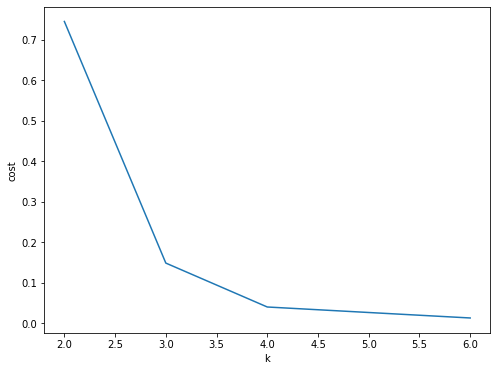

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,7),cost[2:7])
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [ ]:
k = 4
kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(df_kmeans)
centers = model.clusterCenters()

print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[1.42660613]
[133.69967]
[22.688031]
[11.456597]


In [ ]:
transformed = model.transform(df_kmeans)
transformed.show(5)

+--------------------+----------+----------+
|               model|  features|prediction|
+--------------------+----------+----------+
|HGST HMS5C4040ALE640|[0.232942]|         0|
|HGST HMS5C4040BLE640|[0.342336]|         0|
|HGST HUH721212ALE600|[2.599715]|         0|
|HGST HUH721212ALN604|[0.562081]|         0|
|HGST HUH728080ALE600|[1.169897]|         0|
+--------------------+----------+----------+
only showing top 5 rows



In [ ]:
transformed.show()

+--------------------+-----------+----------+
|               model|   features|prediction|
+--------------------+-----------+----------+
|HGST HMS5C4040ALE640| [0.232942]|         0|
|HGST HMS5C4040BLE640| [0.342336]|         0|
|HGST HUH721212ALE600| [2.599715]|         0|
|HGST HUH721212ALN604| [0.562081]|         0|
|HGST HUH728080ALE600| [1.169897]|         0|
|       ST10000NM0086| [1.008705]|         0|
|       ST12000NM0007| [2.223331]|         0|
|         ST4000DM000| [1.963126]|         0|
|       ST500LM012 HN| [8.652877]|         3|
|          ST500LM030|[22.688031]|         2|
|         ST6000DX000| [0.268714]|         0|
|         ST8000DM002| [1.191011]|         0|
|         ST8000DM004|[133.69967]|         1|
|        ST8000NM0055| [1.635442]|         0|
| TOSHIBA MG07ACA14TA| [0.333626]|         0|
|  TOSHIBA MQ01ABF050|[10.879516]|         3|
| TOSHIBA MQ01ABF050M| [3.356425]|         0|
|      WDC WD5000LPCX|[14.837398]|         3|
|      WDC WD5000LPVX| [3.315921]|

In [ ]:
df = spark.read.option("header", "true").csv("C:/data_Q1_2019/*.csv")



In [ ]:
df = df.withColumn("smart_1_normalized", df["smart_1_normalized"].cast('double'))
vecAssembler = VectorAssembler(inputCols=["smart_1_normalized"], outputCol="features")
df_kmeans_2 = vecAssembler.setHandleInvalid("skip").transform(df).select('date','serial_number','model', 'features')
df_kmeans_2.show()

+----------+--------------+--------------------+--------+
|      date| serial_number|               model|features|
+----------+--------------+--------------------+--------+
|2019-03-05|      Z305B2QN|         ST4000DM000| [117.0]|
|2019-03-05|      ZJV0XJQ4|       ST12000NM0007|  [80.0]|
|2019-03-05|      ZJV0XJQ3|       ST12000NM0007|  [83.0]|
|2019-03-05|      ZJV0XJQ0|       ST12000NM0007|  [81.0]|
|2019-03-05|PL1331LAHG1S4H|HGST HMS5C4040ALE640| [100.0]|
|2019-03-05|      ZA16NQJR|        ST8000NM0055|  [75.0]|
|2019-03-05|      ZJV02XWG|       ST12000NM0007|  [83.0]|
|2019-03-05|      ZJV1CSVX|       ST12000NM0007|  [83.0]|
|2019-03-05|      ZJV02XWA|       ST12000NM0007|  [78.0]|
|2019-03-05|      ZA18CEBS|        ST8000NM0055|  [77.0]|
|2019-03-05|      Z305DEMG|         ST4000DM000| [117.0]|
|2019-03-05|      ZA130TTW|         ST8000DM002|  [81.0]|
|2019-03-05|      ZJV1CSVV|       ST12000NM0007|  [74.0]|
|2019-03-05|      ZA18CEBF|        ST8000NM0055|  [80.0]|
|2019-03-05|  

In [ ]:
df.printSchema()

root
 |-- date: string (nullable = true)
 |-- serial_number: string (nullable = true)
 |-- model: string (nullable = true)
 |-- capacity_bytes: string (nullable = true)
 |-- failure: string (nullable = true)
 |-- smart_1_normalized: double (nullable = true)
 |-- smart_1_raw: string (nullable = true)
 |-- smart_2_normalized: string (nullable = true)
 |-- smart_2_raw: string (nullable = true)
 |-- smart_3_normalized: string (nullable = true)
 |-- smart_3_raw: string (nullable = true)
 |-- smart_4_normalized: string (nullable = true)
 |-- smart_4_raw: string (nullable = true)
 |-- smart_5_normalized: string (nullable = true)
 |-- smart_5_raw: string (nullable = true)
 |-- smart_7_normalized: string (nullable = true)
 |-- smart_7_raw: string (nullable = true)
 |-- smart_8_normalized: string (nullable = true)
 |-- smart_8_raw: string (nullable = true)
 |-- smart_9_normalized: string (nullable = true)
 |-- smart_9_raw: string (nullable = true)
 |-- smart_10_normalized: string (nullable = tru

In [ ]:
df_kmeans_2.printSchema()

root
 |-- date: string (nullable = true)
 |-- serial_number: string (nullable = true)
 |-- model: string (nullable = true)
 |-- features: vector (nullable = true)



In [ ]:
Scalerizer=StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
df = Scalerizer.fit(df_kmeans_2).transform(df_kmeans_2)

In [ ]:
cost = np.zeros(7)
for k in range(2,7):
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("Scaled_features")
    model = kmeans.fit(df)
    cost[k] = model.computeCost(df) 

Text(0, 0.5, 'cost')

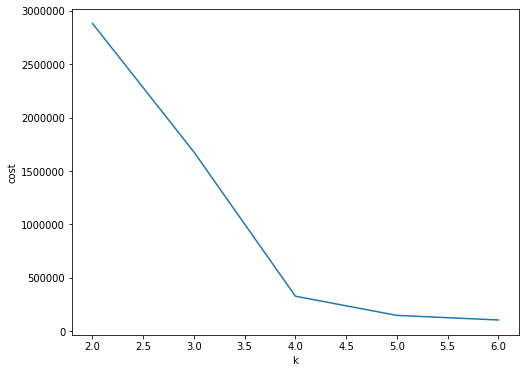

In [ ]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,7),cost[2:7])
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [ ]:
k = 5
kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(df)
centers = model.clusterCenters()

print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[100.38512109]
[81.49903991]
[116.09234413]
[199.99904928]
[73.74751775]


In [ ]:
transformed = model.transform(df)
transformed.show()

+----------+--------------+--------------------+--------+--------------------+----------+
|      date| serial_number|               model|features|     Scaled_features|prediction|
+----------+--------------+--------------------+--------+--------------------+----------+
|2019-03-05|      Z305B2QN|         ST4000DM000| [117.0]|[6.7791793233577256]|         2|
|2019-03-05|      ZJV0XJQ4|       ST12000NM0007|  [80.0]| [4.635336289475368]|         1|
|2019-03-05|      ZJV0XJQ3|       ST12000NM0007|  [83.0]| [4.809161400330694]|         1|
|2019-03-05|      ZJV0XJQ0|       ST12000NM0007|  [81.0]|  [4.69327799309381]|         1|
|2019-03-05|PL1331LAHG1S4H|HGST HMS5C4040ALE640| [100.0]|  [5.79417036184421]|         0|
|2019-03-05|      ZA16NQJR|        ST8000NM0055|  [75.0]| [4.345627771383158]|         4|
|2019-03-05|      ZJV02XWG|       ST12000NM0007|  [83.0]| [4.809161400330694]|         1|
|2019-03-05|      ZJV1CSVX|       ST12000NM0007|  [83.0]| [4.809161400330694]|         1|
|2019-03-0

In [ ]:
import matplotlib.pyplot as plt


twod = plt.scatter(transformed.prediction, transformed.Scaled_features, c=transformed.prediction)
twod.set_xlabel('prediction')
twod.set_ylabel('features')
plt.show()

NameError: name 'transformed' is not defined